# Customer Churn Prediction using Keras #

Main motive of this part is just learn about the keras and how Neural Network Works. also how can we create ANN

In [231]:
import numpy as np
import pandas as pd

In [232]:
df = pd.read_csv('Churn_Modelling.csv')

In [233]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [234]:
# to check datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [235]:
# to check is is there any duplicate rows
df.duplicated().sum()

0

In [236]:
# now we will just check how many customers left the bank
df['Exited'].value_counts()

# See, here data is imbalanced for '0' & '1', ideally we should correct them but right now we will just focus on learning
# 0 : existing customers & 1 : non existing customer

Exited
0    7963
1    2037
Name: count, dtype: int64

In [237]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [238]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

# Now we will drop first three columns as they are not that much important.

In [239]:
df = df.drop(columns=['RowNumber','CustomerId','Surname'])

# We need to convert categorical data into numerical data by performing one-hot encoding.

In [240]:
df_dummy = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True, dtype='int')
print(df_dummy)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1          

# Scaling of data

Here, we have almost all the values of the column between 0 to 1 except CreditScore, Age, Balance, EstimatedSalary columns. So, this is not habit to train model with this difference. That's why we need to perform scaling to keep all the data in the range.

In [241]:
from sklearn.model_selection import train_test_split

x = df_dummy.drop(columns=['Exited'])
y = df_dummy['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_trained_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [243]:
# See, Now we have all the values in the range of (0,1)
# each array describe each customer
x_trained_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

# Now we will apply Keras

In [244]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Types of Keras #
1. Sequential

2. Non-Sequential

In [245]:
# Creating Object 
model = Sequential()

Here, we will have 3 layers. (1) Input Layer, (2) Hidden Layer, (3) Output Layer

Also, we will use 3 Perceptrons which are directly connected to input layer.

# Explaination of the Function :

Dense(how many Percetron do you want to keep, activation = 'name of the activation function', input_dim = 'number of coulumns')

For Better Performance: 

(1) 'relu'  is better than 'sigmoid' function

(2) We can increase Hidden Layers

(3) Also, while model training, we can increase number of epochs

# Below is Architecture of our Artificial Neural Network



In [246]:
model.add(Dense(3,activation='sigmoid',input_dim = 11)) # First Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer


# Here, we can see how many weights and bias are given to each layer
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [247]:
# for better performance and acuracy while compile time we will declare loss_function and Optimizers
# binary_crossentropy is nothing but Log Loss
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


# Finally, Model Training #

epochs : 

We use epochs in model training to repeatedly expose the neural network to the entire training dataset, allowing the model to learn and improve its performance over multiple passes through the data. Each epoch involves one full cycle through the training data.

In [248]:
# Here our NN will be trained
# we willl store all the values of 'accuracy' & 'loss' in a variable to plot graph of loss and Accuracy
acc_loss_model = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.2)

# here, value of error is gradually decreasing

Epoch 1/20
  1/200 ━━━━━━━━━━━━━━━━━━━━ 59s 301ms/step - accuracy: 0.3750 - loss: 0.7216

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - accuracy: 0.5699 - loss: 0.6771 - val_accuracy: 0.7900 - val_loss: 0.5954
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.7909 - loss: 0.5768 - val_accuracy: 0.7975 - val_loss: 0.5374
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.8002 - loss: 0.5209 - val_accuracy: 0.7975 - val_loss: 0.5092
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.7955 - loss: 0.5032 - val_accuracy: 0.7975 - val_loss: 0.4931
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.7941 - loss: 0.4902 - val_accuracy: 0.7975 - val_loss: 0.4818
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.8023 - loss: 0.4683 - val_accuracy: 0.7975 - val_loss: 0.4732
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7973 - loss: 0.4642 - val_accuracy: 0.7975 - val_loss: 0.4660
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.8088 - loss: 0.4446 - val_accurac

In [249]:
# Here we can can weights and bias of first Hidden (layers[0]) layer
model.layers[0].get_weights()

[array([[-0.18385506,  0.08690552,  0.12024862],
        [ 2.1969435 ,  1.5235288 , -1.2151742 ],
        [ 0.09212817, -0.13671681,  0.08421867],
        [ 0.04088664,  0.04423277, -0.27135307],
        [ 0.25622416,  0.24662782,  0.3799564 ],
        [-0.13102868, -0.25563404,  0.0305978 ],
        [-0.40041906, -0.292278  ,  0.86201584],
        [-0.21379252,  0.29305115, -0.15785833],
        [ 0.5799815 ,  0.27310625, -0.53568536],
        [-0.00506579, -0.23203619, -0.0558509 ],
        [ 0.00857781, -0.5075589 ,  0.54235697]], dtype=float32),
 array([-0.5480908 , -0.34361443,  0.80230576], dtype=float32)]

# Model is ready for Prediction

but here, we will get the values between (0,1) bcoz we are using sigmoid function as activation function. which will provide probability. and as we know probability always range between (0,1)

In [250]:
y_pred_data = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


Now, This is out task to convert prediction value in 0 & 1. for that we will apply condition, if probability is > 0.5 then 1 (cutomer will leave the bank) , other wise 0 (cutomer will not leave the bank) 

In [251]:
y_final_pred = np.where(y_pred_data>0.5, 1, 0)

In [252]:
y_final_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Accuracy of our Model

In [253]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

Accuracy of the ANN is :  80.5 %


In [254]:
import matplotlib.pyplot as plt

In [255]:
# values 
acc_loss_model.history

{'accuracy': [0.6703125238418579,
  0.7973437309265137,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7971875071525574,
  0.7973437309265137,
  0.7982812523841858,
  0.8043749928474426,
  0.8065624833106995,
  0.8084375262260437,
  0.8114062547683716,
  0.8128125071525574,
  0.8128125071525574,
  0.8125],
 'loss': [0.6456894874572754,
  0.5578423142433167,
  0.5175300240516663,
  0.4963845908641815,
  0.48298874497413635,
  0.47300881147384644,
  0.46487048268318176,
  0.45780614018440247,
  0.4513972997665405,
  0.44583848118782043,
  0.44106632471084595,
  0.4370729923248291,
  0.4338856041431427,
  0.43141597509384155,
  0.42956623435020447,
  0.4281229078769684,
  0.42709797620773315,
  0.42613956332206726,
  0.42543965578079224,
  0.42477279901504517],
 'val_accuracy': [0.7900000214576721,
  0.7975000143051147,
  0.7975000143051147,
  0.797500014305

# Difference of loss_alue (error_value) between training and testing phase

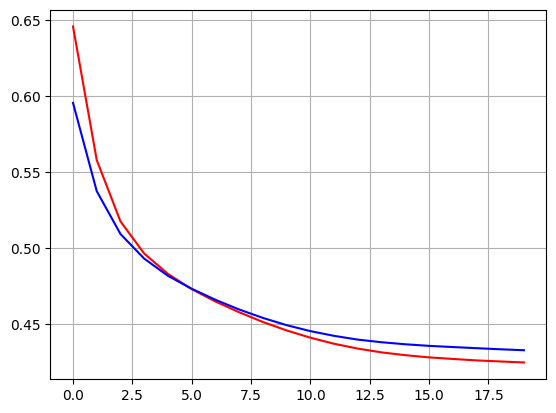

In [256]:
plt.plot(acc_loss_model.history['loss'],color='Red')
plt.plot(acc_loss_model.history['val_loss'],color='blue')
plt.grid()

# Difference of accuracy of loss_alue (error_value) between training and testing phase

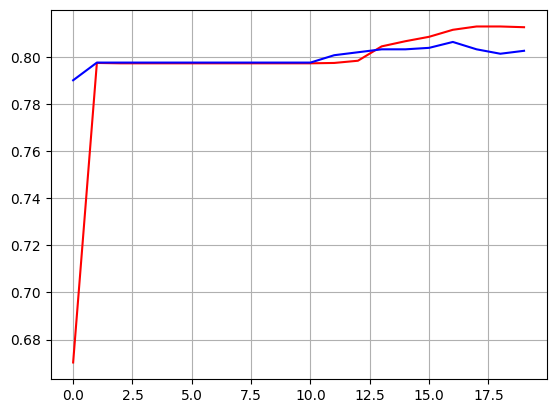

In [257]:
plt.plot(acc_loss_model.history['accuracy'],color='Red')
plt.plot(acc_loss_model.history['val_accuracy'],color='blue')
plt.grid()
plt.show()

# Here, we are getting overfitting model bcoz, accuracy  > val_accuracy. To handle this we need to perform regularization on dataset.